# **Dataset**

In [ ]:
from keras.models import load_model, Model
import numpy as np


import argparse
from keras.models import load_model, Model
import numpy as np
import tensorflow as tf
import keras.backend as K

from keras.datasets import mnist, cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.regularizers import l2

CLIP_MIN = -0.5
CLIP_MAX = 0.5

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train = (x_train / 255.0) - (1.0 - CLIP_MAX)
x_test = (x_test / 255.0) - (1.0 - CLIP_MAX)

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


model = load_model('/content/drive/MyDrive/sadl11/model/model_cifar.h5')
model.summary()
b = np.load('/content/drive/MyDrive/Diversity/b_act6_cifar.npy')
print("feature shape", b.shape)

y_test=np.argmax(y_test, axis=1)
y_train=np.argmax(y_train, axis=1)

170508288/170498071 [==============================] - 6s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_2 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        

# **Do normalization**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
from sklearn.decomposition import PCA as sklearnPCA
from keras.models import load_model, Model

def scale(X, x_min, x_max):
    nom = (X-X.min(axis=0))*(x_max-x_min)
    denom = X.max(axis=0) - X.min(axis=0)
    denom[denom==0] = 1
    return x_min + nom/denom 


def scale_one(X):
  nom = (X-X.min())*(1)
  denom = X.max() - X.min()
  koko= nom/denom 
  return koko



# **Feature Extraction**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
from sklearn.decomposition import PCA as sklearnPCA

from keras.models import load_model, Model


model = VGG16(weights='imagenet', include_top=False)

features = model.predict(x_test)

features= features.reshape((10000,512))
X_scf = scale(features, 0, 1)
print(X_scf)
print(X_scf.shape)
fe = model.predict(x_train)
fe= fe.reshape((50000,512))
X_scft = scale(fe, 0, 1)
print(X_scft)
print(X_scft.shape)
# model1 = load_model('/content/drive/MyDrive/sadl11/model/model_cifar.h5')
# y_predict= model1(x_test)
# y_predict= np.argmax(y_predict, axis=1)


In [ ]:
model1 = load_model('/content/drive/MyDrive/sadl11/model/model_cifar.h5')
y_predict= model1(x_test)
y_predict= np.argmax(y_predict, axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
xtest_standard = scaler.fit_transform(features)
xtrain_standard = scaler.fit_transform(fe)

# **MIS-Predicted inputs**

standard



In [ ]:
# def mis(inputtest, inputtrain):


#define these:
# orgtest=features
# orgtrain=fe
# scalenormtest=X_scft
# scalenormtrain=X_scf
# standardtest= xtest_standard
# standard_train=xtrain_standard
inputtest=X_scf
inputtrain=X_scft

mis_index=[]
tt=[]
tst=[]
for i in range(len(inputtest)):
  if (y_test1[i]!=y_predict11[i]):
    mis_index.append(i)
    tt.append(y_test[i])
    tst.append(y_predict[i])
x_mis=np.zeros((len(mis_index),512))
# x_org=np.zeros((len(mis_index),32*32*3))
# x_tst= x_test.reshape(10000,32*32*3)
# x_trn=x_train.reshape(50000,32*32*3)
j=0
for i in mis_index:
  x_mis[j,:]=inputtest[i,:]
  j+=1
####################################################TRain input


mis_tindex=[]
for i in range(len(inputtrain)):
  y_tpredict= model1(x_train[i:i+1])
  y_tpredict= np.argmax(y_tpredict, axis=1)
  y_tpredict=int(y_tpredict)
  # print("y",y_tpredict)
  if (y_train[i]!=y_tpredict):
    # print(y_train[i])
    mis_tindex.append(i)
    tt.append(y_train[i])
    tst.append(y_tpredict)
    x_mis=np.concatenate((x_mis[:], inputtrain[i,None]), axis=0)
    # x_org=np.concatenate((x_org[:], x_trn[i,None]), axis=0)
print(x_mis.shape)



(134, 512)


In [ ]:
def mis(VGGinputtest, VGGinputtrain):

  #define these:
  # orgtest=features
  # orgtrain=fe
  # scalenormtest=X_scft
  # scalenormtrain=X_scf
  # standardtest= xtest_standard
  # standard_train=xtrain_standard

  mis_index=[]
  tt=[]
  tst=[]
  jjj=0
  for i in range(len(VGGinputtest)):
    if (y_test[i]!=y_predict[i]):
      mis_index.append(i)
      tt.append(y_test[i])
      tst.append(y_predict[i])
      jjj=jjj+1
  print(jjj)
  x_s=np.zeros((len(mis_index),512))
  j=0
  for i in mis_index:
    x_s[j,:]=VGGinputtest[i,:]
    j+=1

  mis_tindex=[]
  for i in range(len(VGGinputtrain)):
    y_tpredict= model1(x_train[i:i+1])
    y_tpredict= np.argmax(y_tpredict, axis=1)
    y_tpredict=int(y_tpredict)
    # print("y",y_tpredict)
    if (y_train[i]!=y_tpredict):
      # print(y_train[i])
      mis_tindex.append(i)
      tt.append(y_train[i])
      tst.append(y_tpredict)
      x_s=np.concatenate((x_s[:], VGGinputtrain[i,None]), axis=0)
      jjj=jjj+1
  print(jjj)
      # x_org=np.concatenate((x_org[:], x_trn[i,None]), axis=0)
  print(x_s.shape)
  return x_s, tt , tst , mis_index, mis_tindex



# **HDBSCAN Clustering**

In [ ]:
!pip install umap-learn

!pip install tslearn
!pip install hdbscan

     |████████████████████████████████| 86 kB 4.4 MB/s 
     |████████████████████████████████| 1.1 MB 42.8 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=ba50d3498e39a1d0ef7146505ae5a9b4603a8b2bb33a3247bb75c81bd66b7d30
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=492eb60d25591d9783179573d49fee1c0d33779e46df30825396ff02c2a31068
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent
     |████████████████████████████████| 793 kB 12.3 MB/s 
     |████████████████████████████████| 6.4 MB 16.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_

In [ ]:

import time
import copy
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns
import hdbscan
import copy


from tslearn.generators import random_walks
from tslearn.metrics import cdist_dtw
import sklearn.metrics
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
# import umap
import umap.umap_ as umap


plot_kwds = {'alpha' : 0.15, 's' : 80, 'linewidths':0}
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    print("labels", labels)
    print("max", labels.max())
    global ll
    ll=copy.deepcopy(labels)
    # ll.sort()
    print(ll)
    kk=list(copy.deepcopy(ll))
    goo=copy.deepcopy(ll)
    goo.sort()
    # for i in range(-1,goo.max()):
    i=-1
    while (i<= goo.max()):
      k=kk.count(i)
      print("number of inputs in class",i,"is", k)
      i=i+1
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

# **Hyperparameter Tuning and EVALUATION**

In [ ]:
tt=np.array(tt)
tst=np.array(tst)
tt_scale=scale_one(tt)
tst_scale=scale_one(tst)
import pandas as pd
from sklearn import linear_model
import sklearn
from tabulate import tabulate
from math import sqrt

Streaming output truncated to the last 5000 lines.
number of inputs in class 569 is 3
number of inputs in class 570 is 5
number of inputs in class 571 is 6
number of inputs in class 572 is 5
number of inputs in class 573 is 10
number of inputs in class 574 is 4
number of inputs in class 575 is 14
number of inputs in class 576 is 3
number of inputs in class 577 is 5
number of inputs in class 578 is 3
number of inputs in class 579 is 5
number of inputs in class 580 is 6
number of inputs in class 581 is 3
number of inputs in class 582 is 11
number of inputs in class 583 is 3
number of inputs in class 584 is 6
number of inputs in class 585 is 15
number of inputs in class 586 is 6
number of inputs in class 587 is 4
number of inputs in class 588 is 4
number of inputs in class 589 is 9
number of inputs in class 590 is 4
number of inputs in class 591 is 4
number of inputs in class 592 is 6
number of inputs in class 593 is 6
number of inputs in class 594 is 5
number of inputs in class 595 is 4


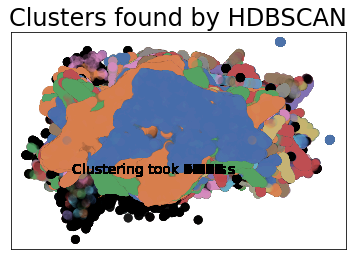

In [ ]:

kk=[]
trace=[]
ss_tt=[]
d_scale_umap=[]
bb=[]
hdbscan_in_umap=[]
for i,j in zip([150,50,40,30,20,300,250,200,100],[130,40,30,20,10,250,230,150,90]):
  for k,o in zip([5,10,15,20,25,35,40],[3,5,10,15,20,30,35]):
    for n_n in [0.03, 0.1, 0.25, 0.5]:
      fit = umap.UMAP(min_dist=n_n, n_components=i, n_neighbors=k)
      %time u1 = fit.fit_transform(x_mis)
      fit = umap.UMAP(min_dist=0.1, n_components=j,n_neighbors=o)
      %time u = fit.fit_transform(u1)
      u=np.c_[u, tt_scale]
      u=np.c_[u, tst_scale]
      print("u",u.shape)
      for gg in [3,5,10,15,20,30,35,40]:
        print("len", len(list(bb)))
        
        plot_clusters(u, hdbscan.HDBSCAN, (), {'min_cluster_size':gg})
        # print("noisy", list(ll).count(-1))
        jo=sklearn.metrics.silhouette_score(u, ll)
        if (ll.max()>20 and ll.max()+2<300 and list(ll).count(-1)<600):
          kk.append(list(ll).count(-1))
          my_trace = [i,j,k,o,gg,ll.max()+2,list(ll).count(-1)]
          trace.append(my_trace)
          #x_mis standarde
          ss=sklearn.metrics.silhouette_score(x_mis, ll) 
          print("###############################################################################################################################################")
          print("###############################################################################################################################################")
          print("x_stand",ss)
          if (jo>=0.6):
            bb.append(ll)
          # print("ll",ll)
            umap_gg=[u,gg]
            hdbscan_in_umap.append(umap_gg)
            ss_trace= [i,k,n_n,gg,ll.max()+2,list(ll).count(-1)]
            ss_tt.append(ss_trace)
            print(ss_trace)


In [ ]:
umapinput=np.load("/content/drive/MyDrive/RQ2/Clustering/Cifar_12conv_BB/hdbscan_input_umap_labels3(2coulmns).npy", allow_pickle= True)

bb=np.load("/content/drive/MyDrive/RQ2/Clustering/Cifar_12conv_BB/Three_clustering_labels3(2coulmns).npy")

In [ ]:
sklearn.metrics.silhouette_score(umapinput[0][0], bb[0])

0.7114384699007786

In [ ]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from tslearn.generators import random_walks
from tslearn.metrics import cdist_dtw
import sklearn.metrics
import numpy as np
from sklearn.decomposition import PCA

ko=np.array(trace)[:,6]
jo=np.array(trace)[:,6]
jo.sort()
scores=[]
bb=[]
d_scale_umap=[]
hh=0

while (len(bb)<3):
  # while (sort_trace["number_noisy"][hh]>=100):
  for hh in [5,8,9,23,33]:
    i=sort_trace.iloc[hh]["n_components1"]
    j=sort_trace.iloc[hh]["n_components2"]
    k=sort_trace.iloc[hh]["n_neighbors1"]
    o=sort_trace.iloc[hh]["n_neighbors2"]
    gg=int(sort_trace.iloc[hh]["min_cluster_size"])
    fit = umap.UMAP(min_dist=0.1, n_components=i, n_neighbors=k)
    # x_org=mis(features, fe)
    %time u1 = fit.fit_transform(x_mis)
    # u1=scaler.fit_transform(u1)
    # for nnn in [40,50,70,80,100,150]:
    #   pca = PCA(n_components=nnn)
    #   u1=pca.fit_transform(x_org)
      # print(pca.explained_variance_ratio_)
      # print(pca.singular_values_)
    fit = umap.UMAP(min_dist=0.1, n_components=j,n_neighbors=o)
    %time u = fit.fit_transform(u1)
    c=scale(u,0,1)
    plt.scatter(u[:,0], u[:,1], c=c[:,0:4])
    plt.title('UMAP embedding of random colours min_dist = {}'.format(0.1));
    plot_clusters(u, hdbscan.HDBSCAN, (), {'min_cluster_size':gg})
    plt.pause(0.05)
    print("noisy", list(ll).count(-1))
    print("x_stnd",sklearn.metrics.silhouette_score(x_mis, ll) )
    print("x_orgvgg",sklearn.metrics.silhouette_score(x_org, ll) )
    # print("x_standard",sklearn.metrics.silhouette_score(x_standard, ll) )
    print("x_umap", sklearn.metrics.silhouette_score(u, ll) )
    if (list(ll).count(-1)<=120 and ll.max()>14):
      print("llllllllllllllll",ll)
      bb.append(ll)
      print("ll",ll)
      uu=[u,gg]
      d_scale_umap.append(uu)
    print("tekrar",hh)

# **HEatmap manually evaluation**

3 clustering results

29


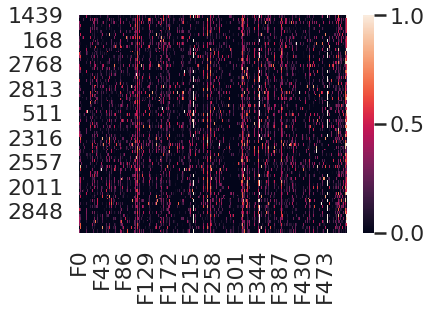

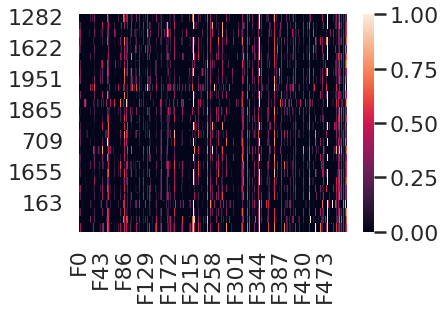

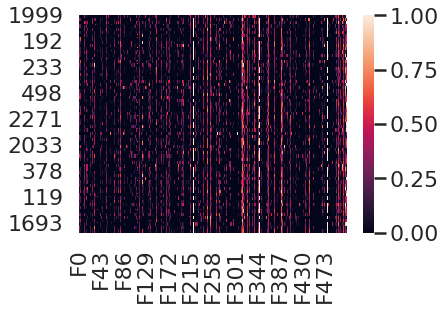

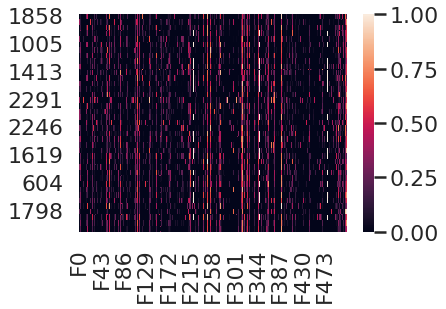

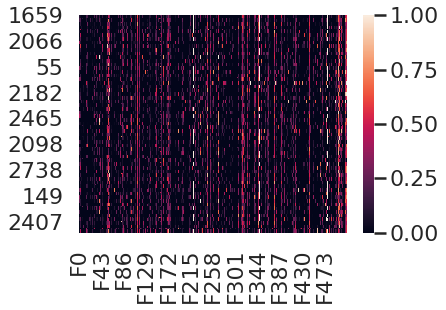

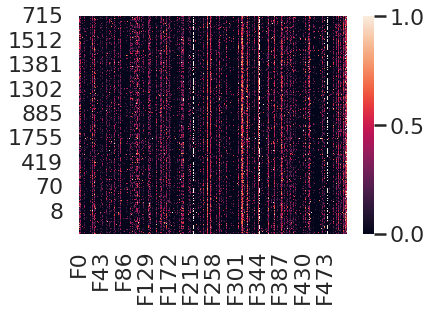

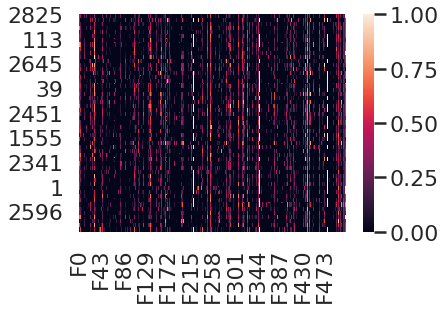

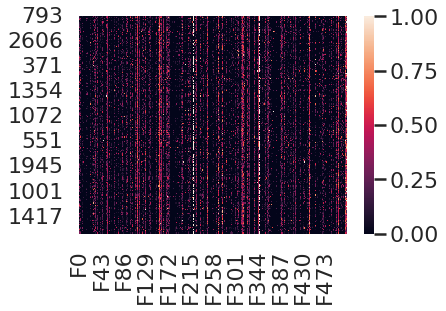

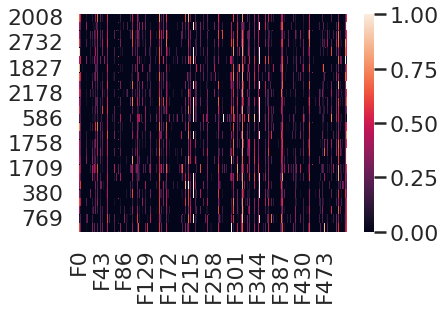

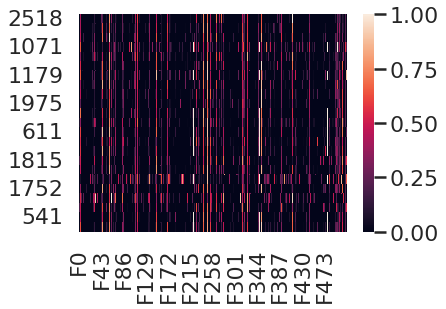

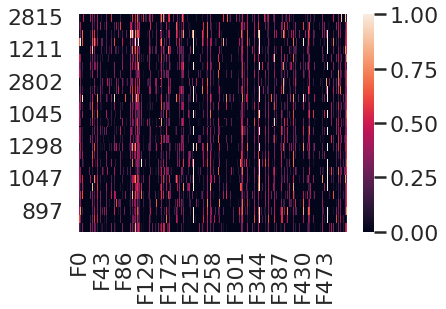

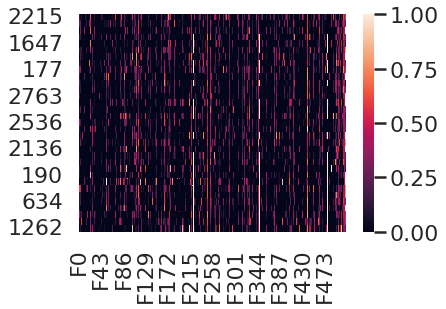

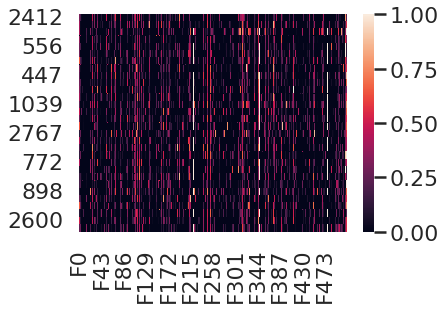

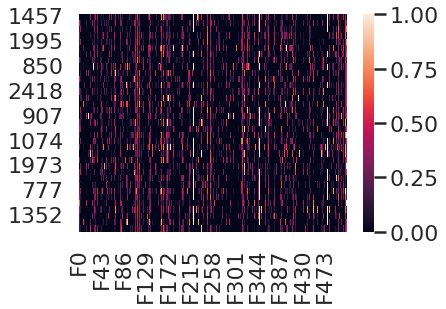

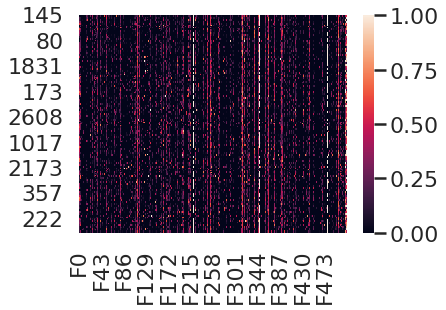

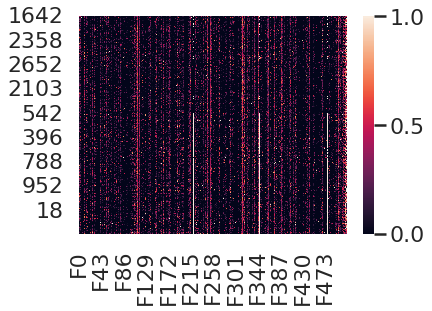

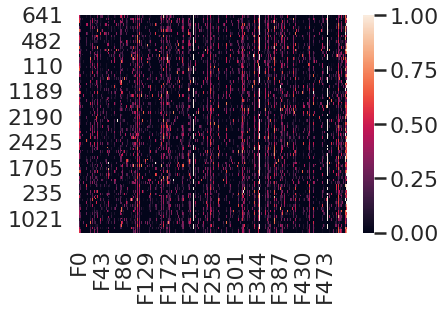

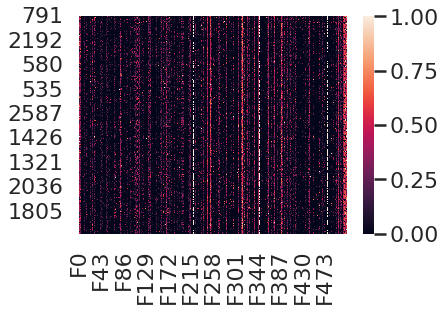

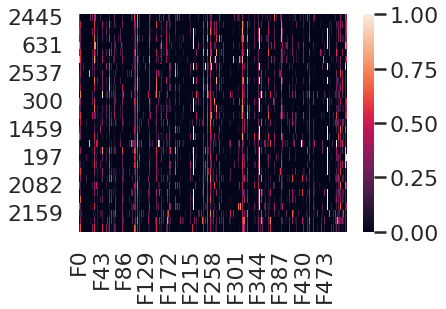

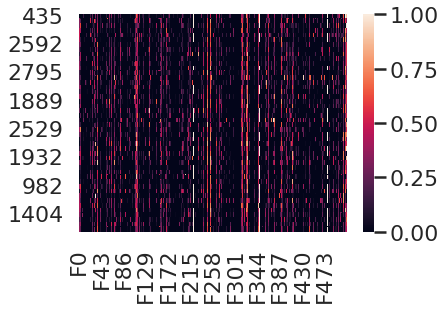

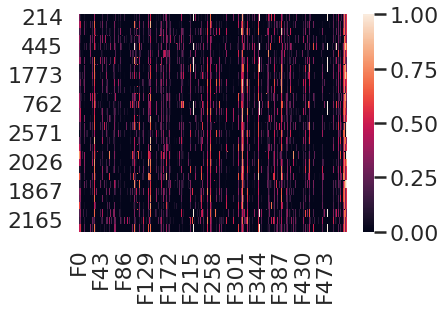

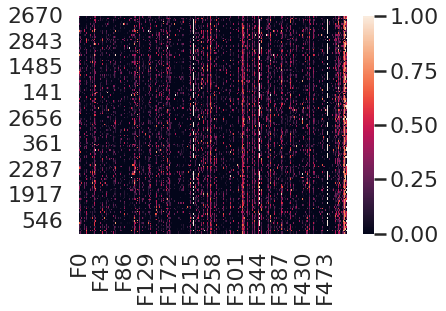

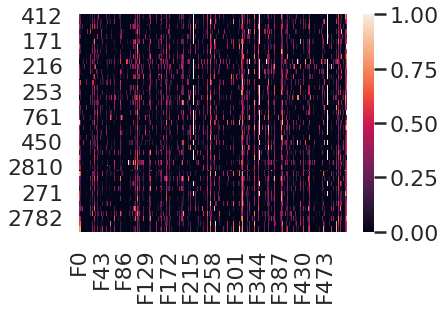

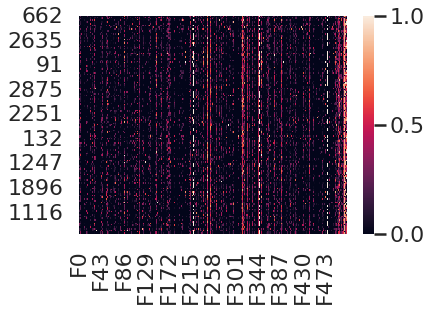

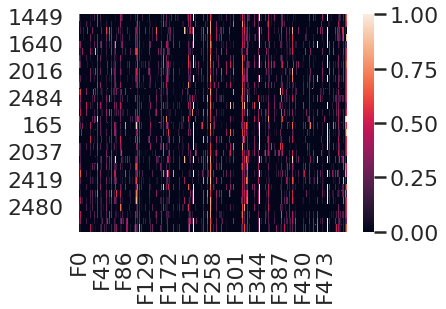

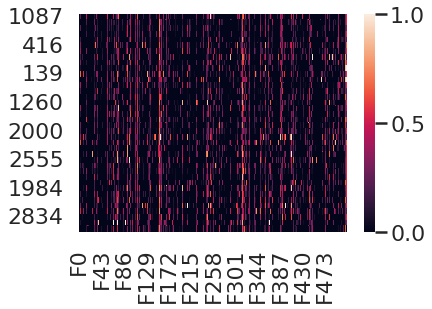

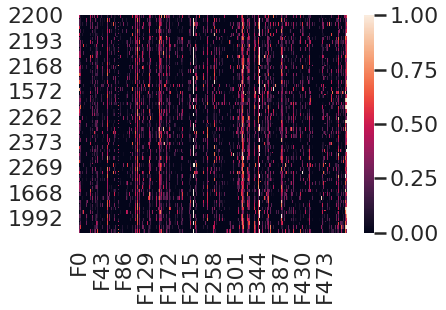

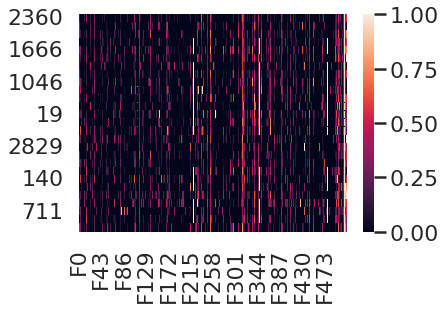

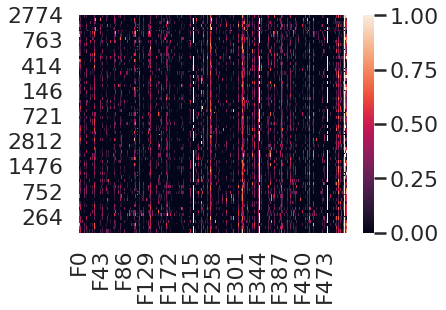

In [ ]:
# libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



coulmn_f=[]
for i in range(len(x_mis[1,:])):
  coulmn_f.append("F"+str(i))

# Create a dataset
df = pd.DataFrame(x_mis, columns=coulmn_f)
# create dataset
# df = np.random.randn(30, 30)
df['clusters']=bb[0].astype(float)
# df.loc[df['clusters'] == v]
# scale(np.array(tt).astype(float),0,1)
# tst=scale(np.array(tst).astype(float),0,1)
df["true labels"]=list(np.array(tt).astype(float))
df["mispredicted class"]=list(np.array(tst).astype(float))
# dmn=np.array(df)
# dff=scale(df,0,1)

coulmn_f.append('clusters')
coulmn_f.append('true labels')
coulmn_f.append('mispredicted class')
# df=pd.DataFrame(dff, columns=coulmn_f)
# df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
import pandas as pd
from sklearn.preprocessing import minmax_scale
df=minmax_scale(df)
df=pd.DataFrame(df, columns=coulmn_f)
df=df.sort_values(by=['clusters'], ascending=True)
mylist = list(dict.fromkeys(list(df['clusters'])))
print(len(mylist))
# cmap="YlGnBu"
for v in mylist:
  # dff=df.loc[df['clusters'] == v]
  # plot heatmap
  sns.heatmap(df.loc[df['clusters'] == v])
  plt.show()
  v=v+1
  plt.pause(0.05)



120


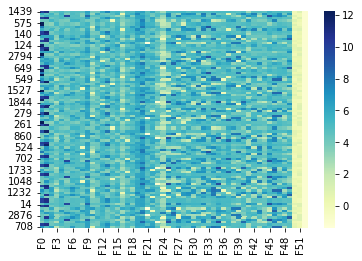

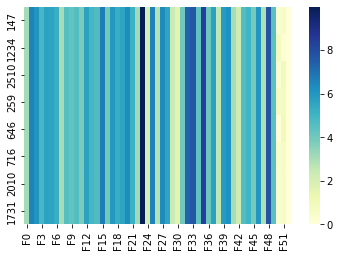

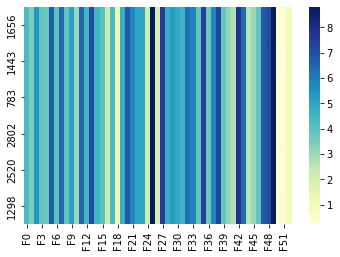

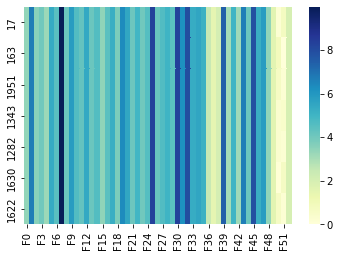

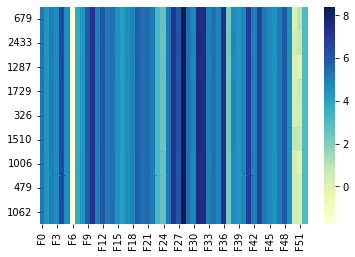

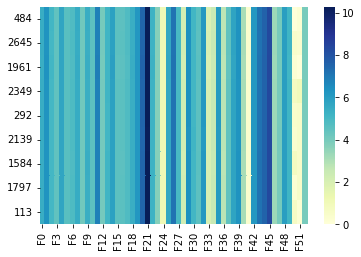

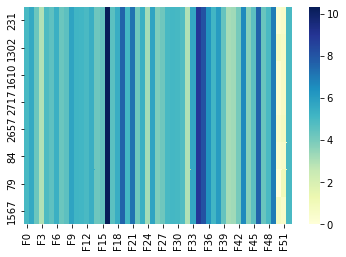

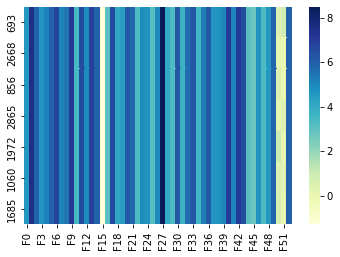

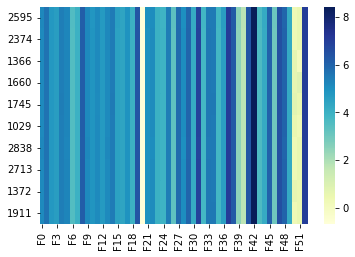

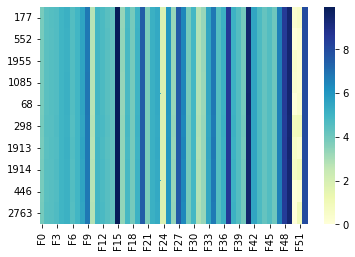

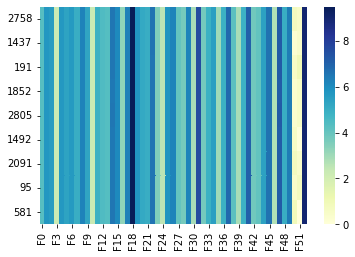

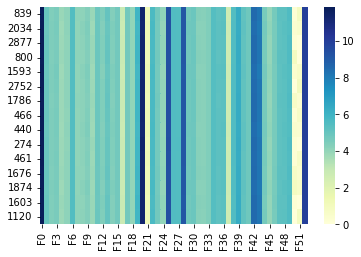

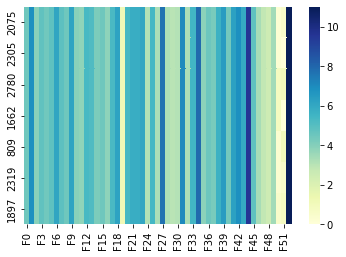

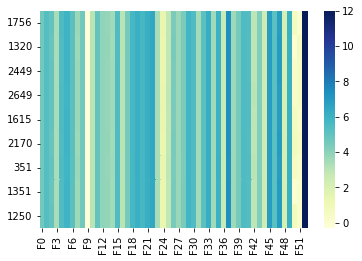

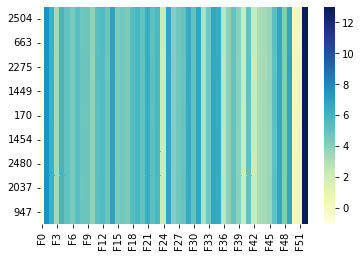

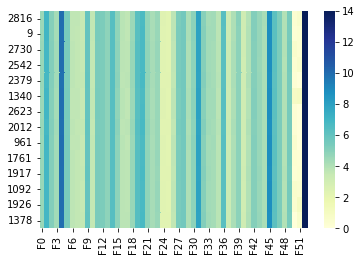

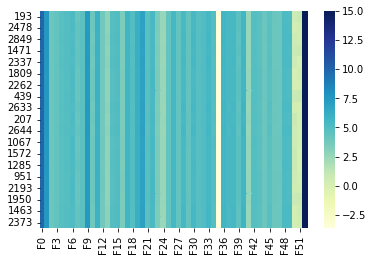

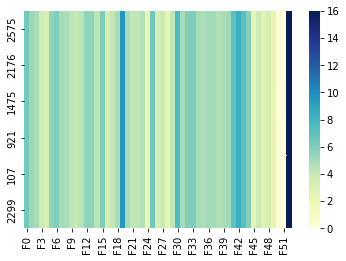

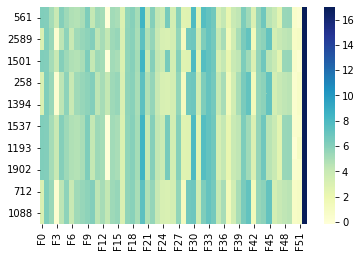

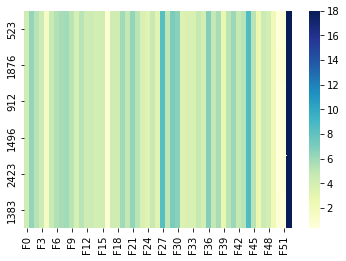

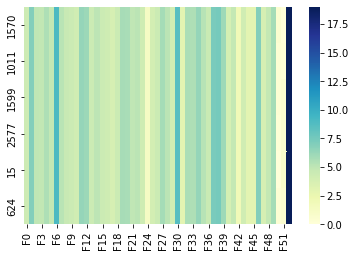

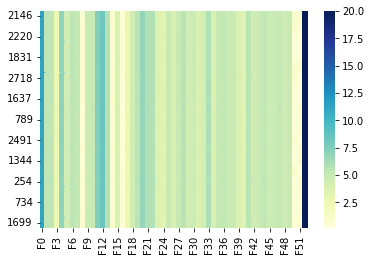

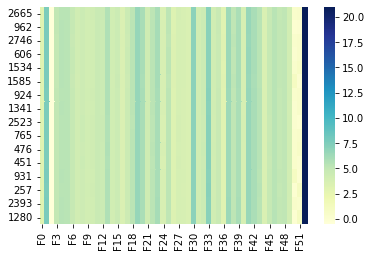

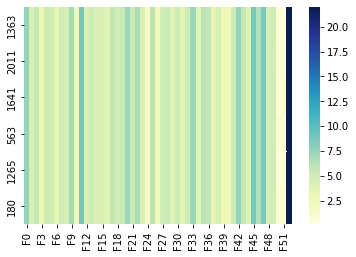

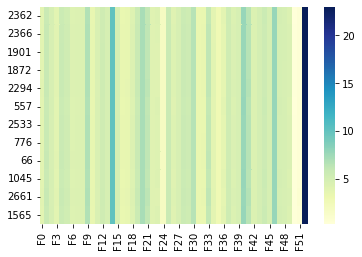

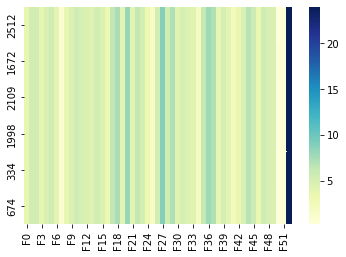

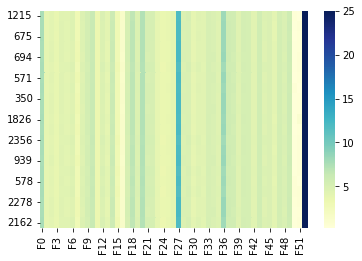

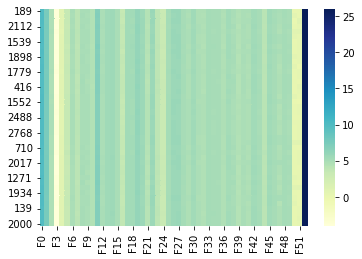

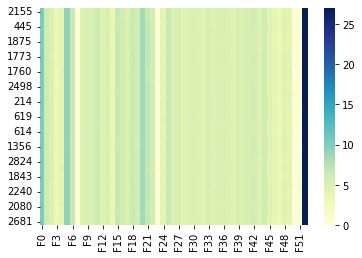

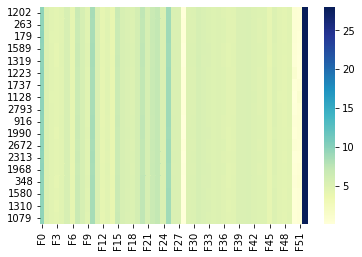

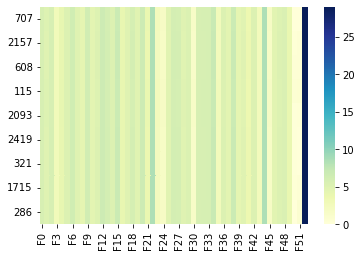

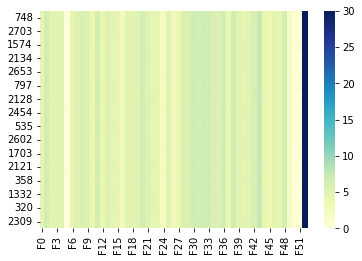

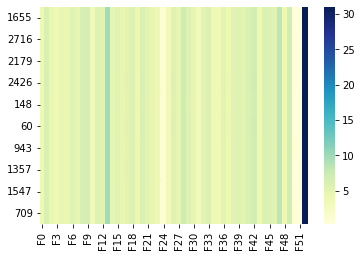

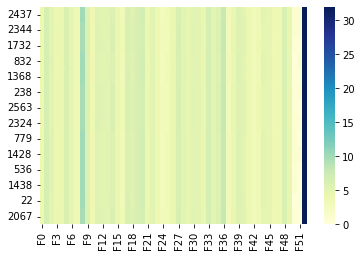

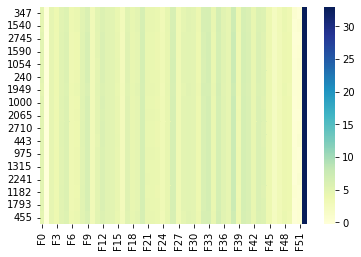

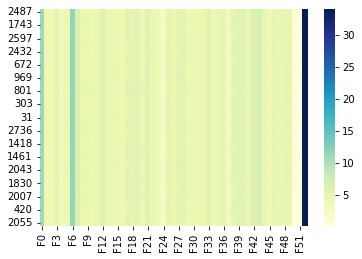

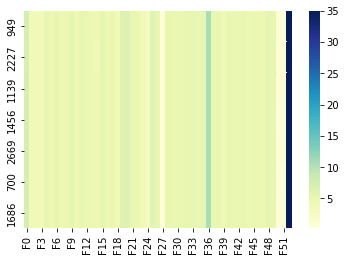

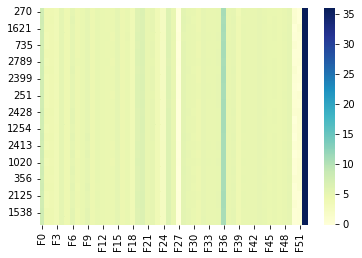

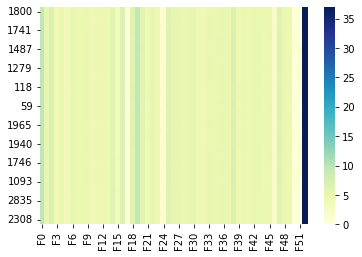

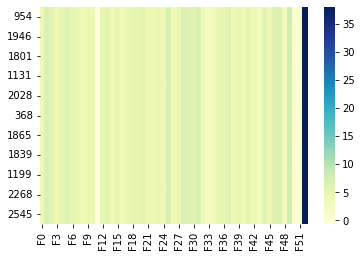

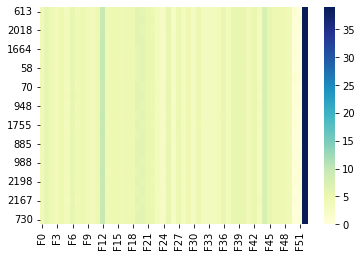

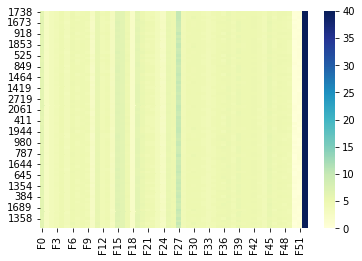

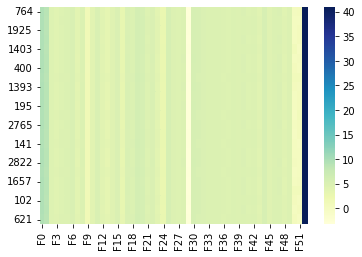

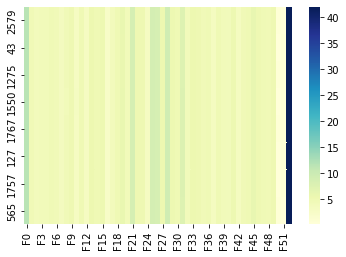

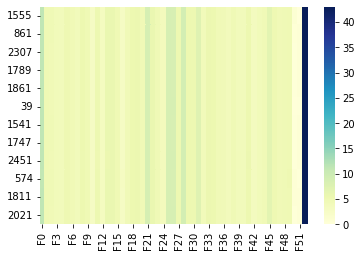

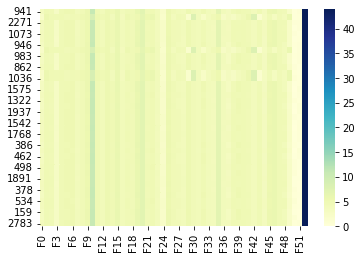

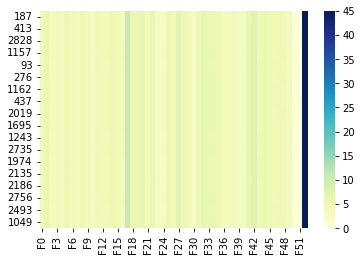

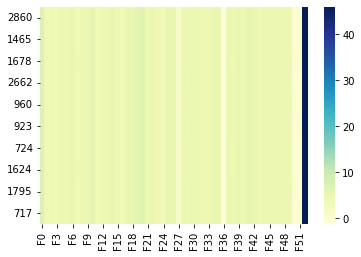

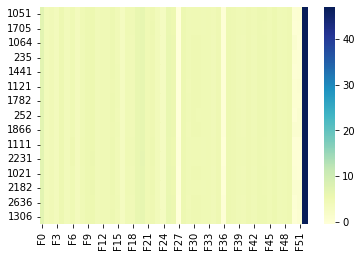

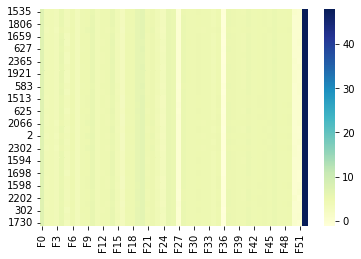

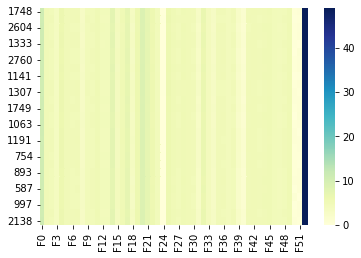

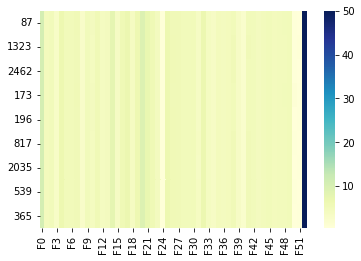

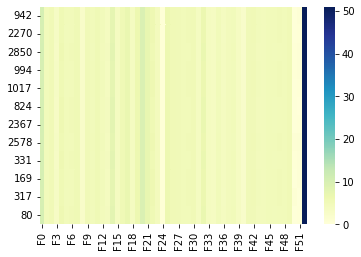

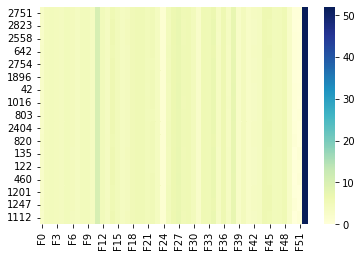

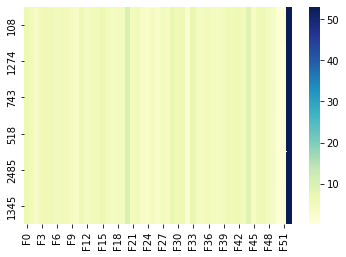

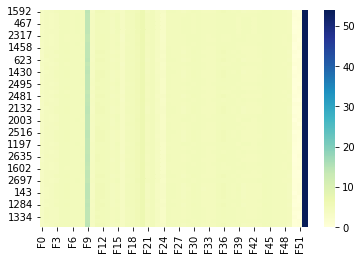

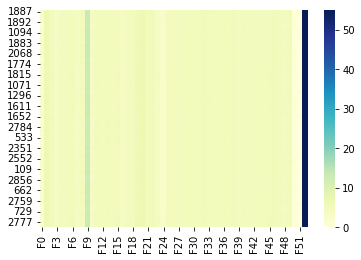

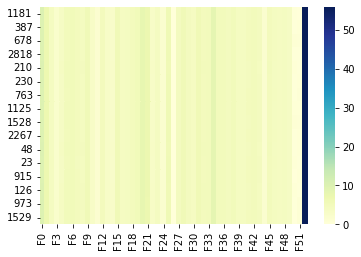

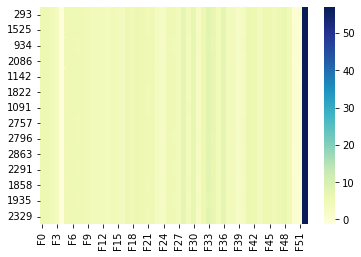

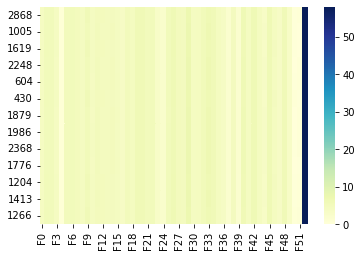

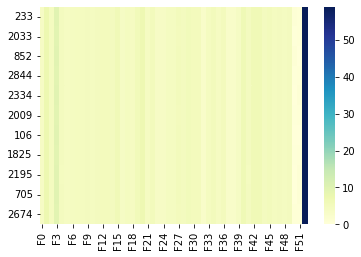

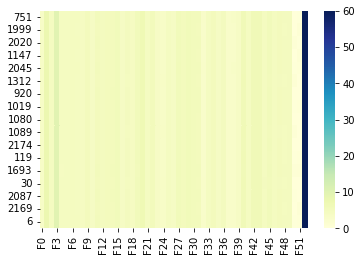

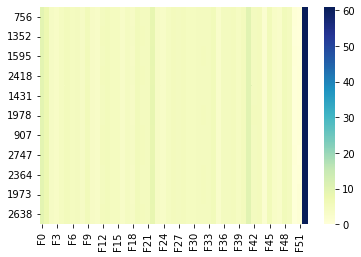

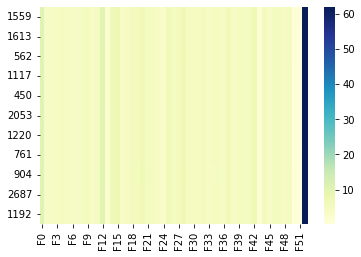

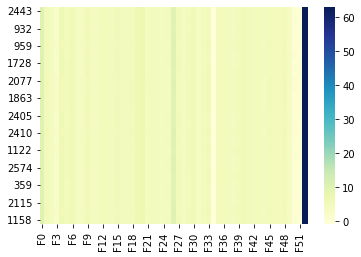

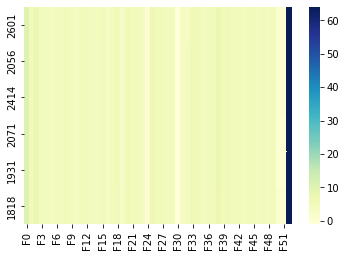

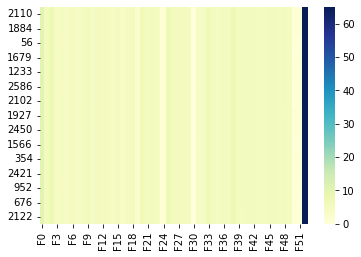

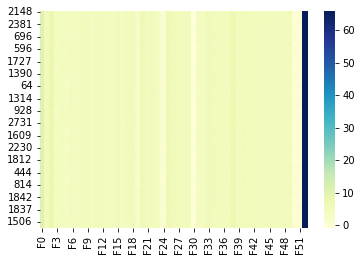

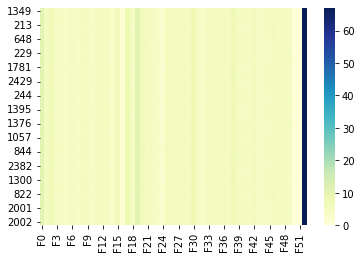

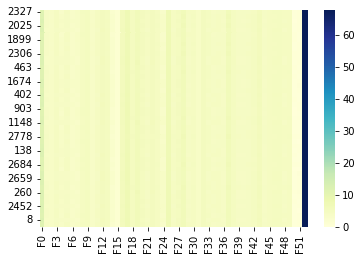

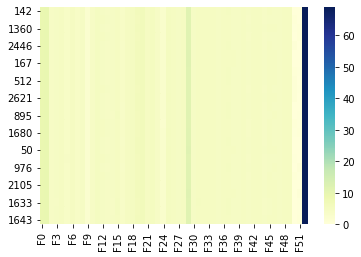

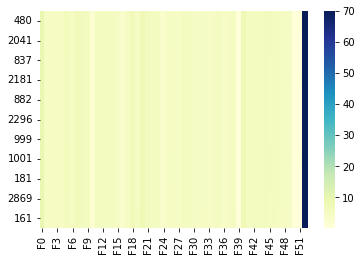

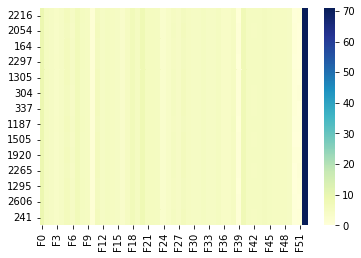

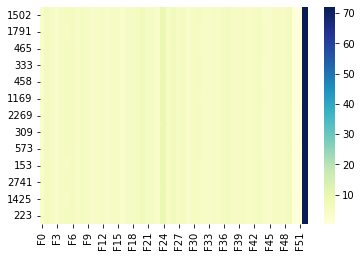

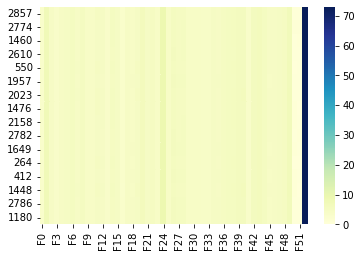

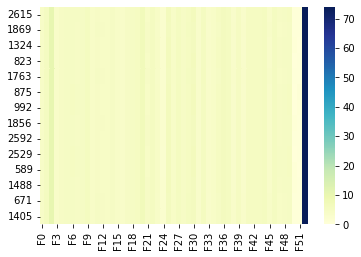

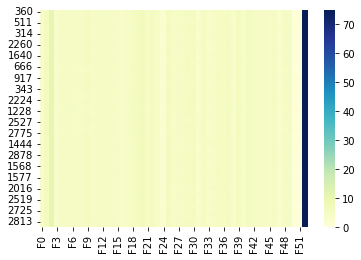

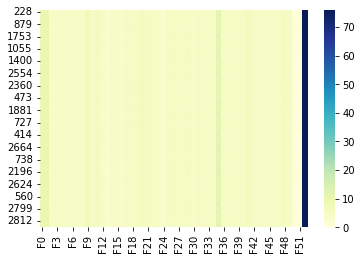

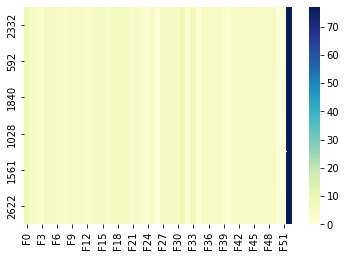

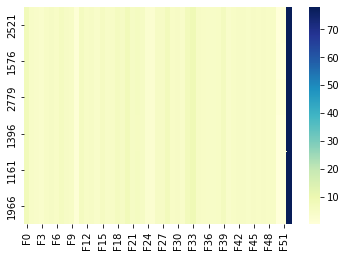

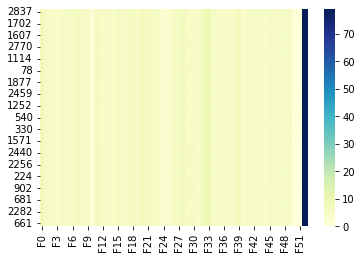

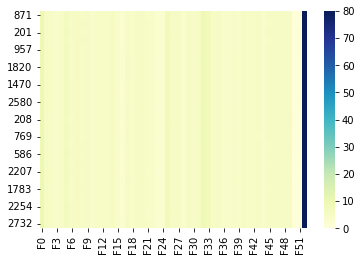

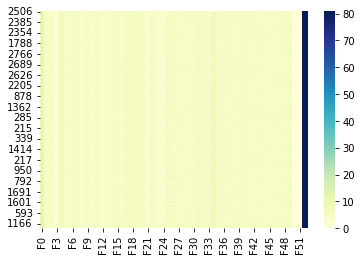

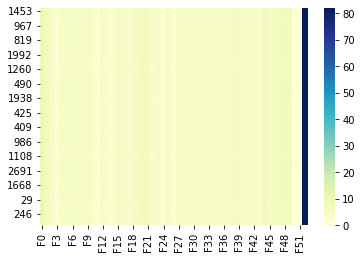

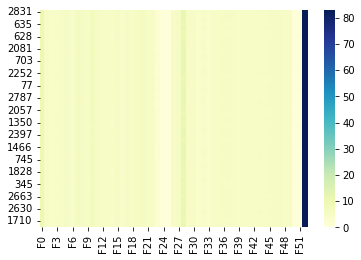

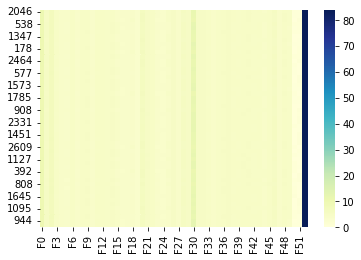

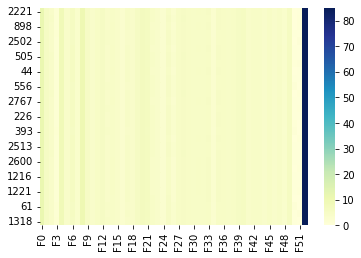

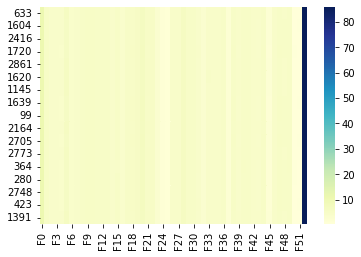

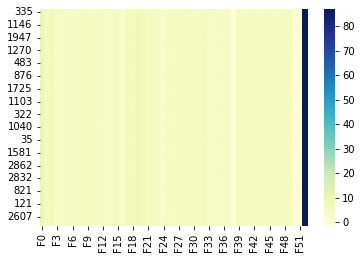

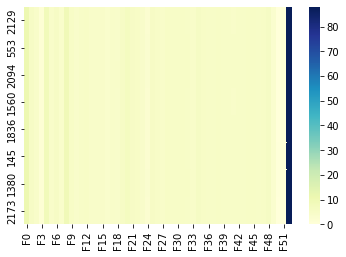

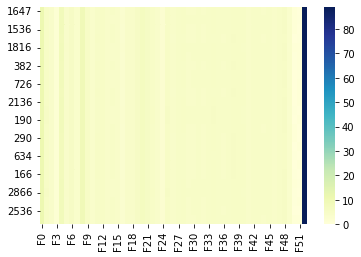

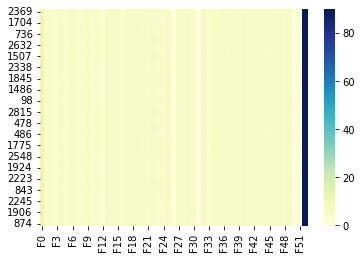

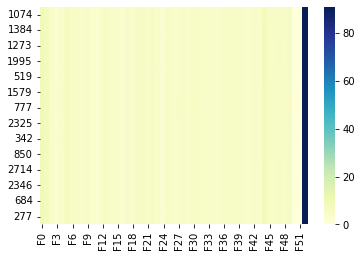

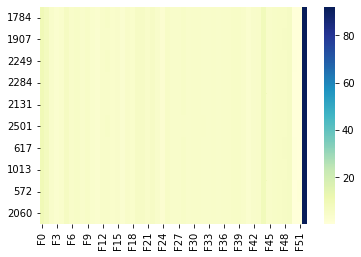

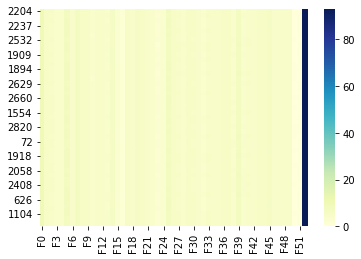

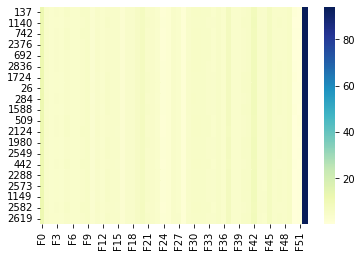

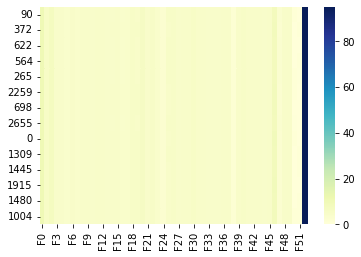

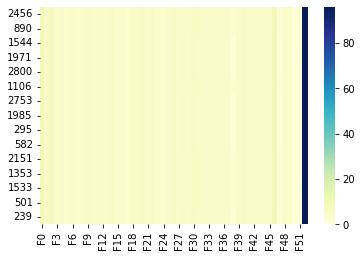

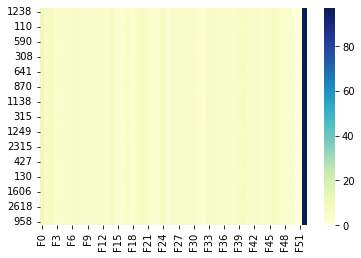

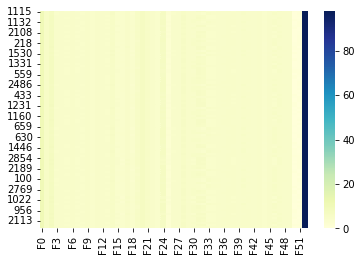

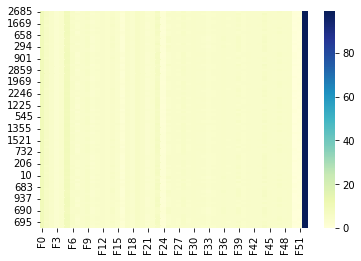

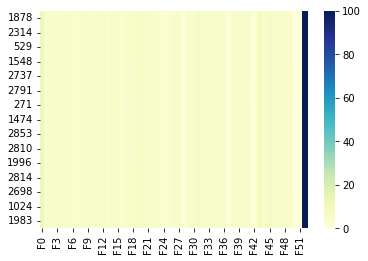

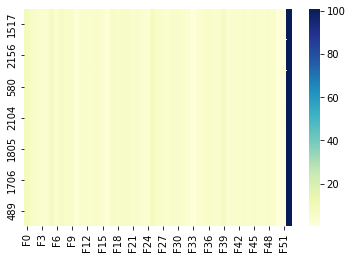

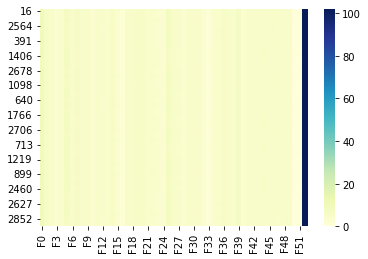

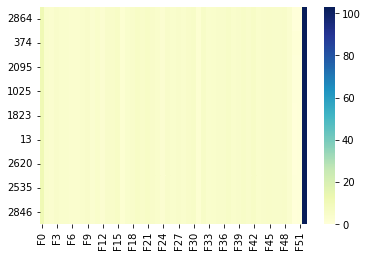

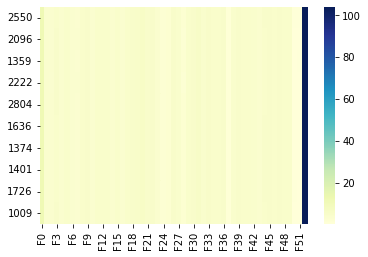

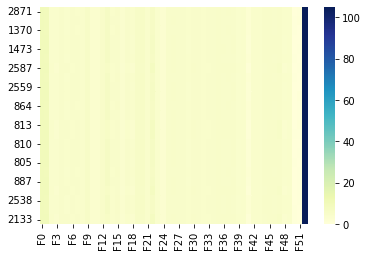

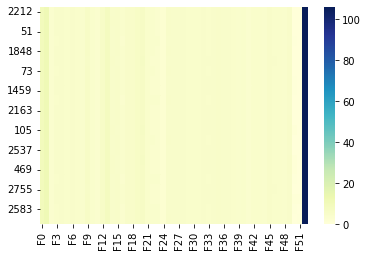

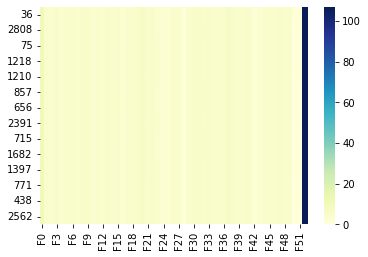

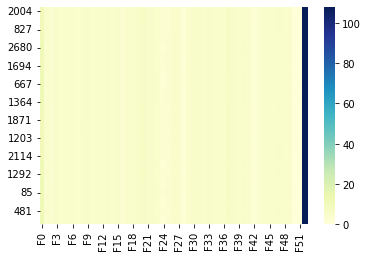

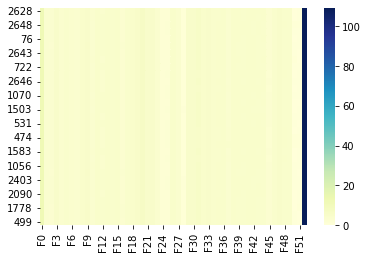

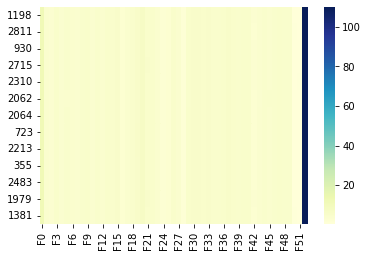

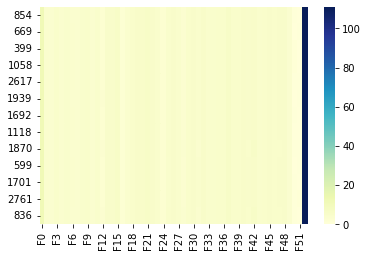

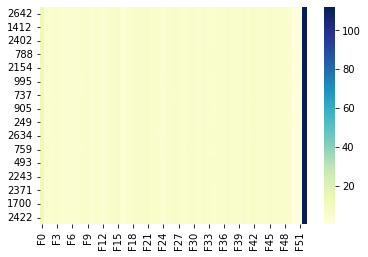

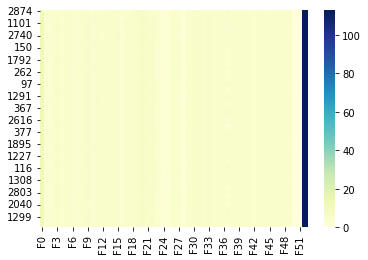

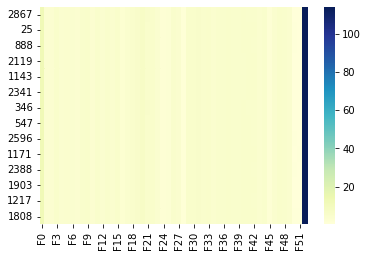

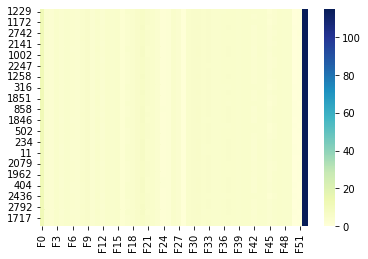

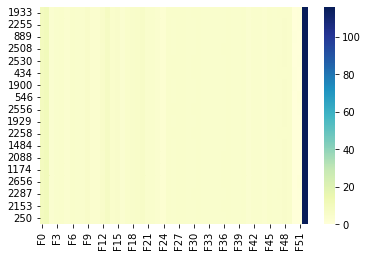

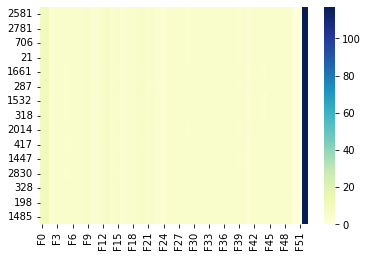

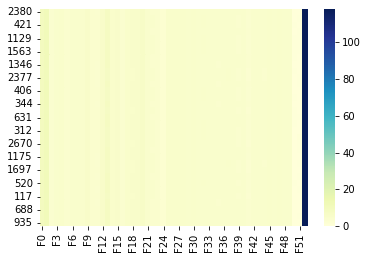

In [ ]:
# libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



coulmn_f=[]
u=hdbscan_in_umap[3][0]
for i in range(len(u[1,:])):
  coulmn_f.append("F"+str(i))

# Create a dataset
df = pd.DataFrame(u, columns=coulmn_f)
# create dataset
df['clusters']=bb[3]
# .astype(float)
# df.loc[df['clusters'] == v]
# scale(np.array(tt).astype(float),0,1)
# tst=scale(np.array(tst).astype(float),0,1)
# df["true labels"]=list(np.array(tt).astype(float))
# df["mispredicted class"]=list(np.array(tst).astype(float))
coulmn_f.append('clusters')
# coulmn_f.append('true labels')
# coulmn_f.append('mispredicted class')
# df=pd.DataFrame(dff, columns=coulmn_f)
# df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
import pandas as pd
from sklearn.preprocessing import minmax_scale
# df=minmax_scale(df)
df=pd.DataFrame(df, columns=coulmn_f)
df=df.sort_values(by=['clusters'], ascending=True)
mylist = list(dict.fromkeys(list(df['clusters'])))
print(len(mylist))

for v in mylist:
  # dff=df.loc[df['clusters'] == v]
  # plot heatmap
  sns.heatmap(df.loc[df['clusters'] == v], cmap="YlGnBu")
  plt.show()
  v=v+1
  plt.pause(0.05)



# **DBCV evaluation**

In [ ]:
import numpy as np
from scipy.spatial.distance import euclidean, cdist
from scipy.sparse.csgraph import minimum_spanning_tree
from scipy.sparse import csgraph


def DBCV(X, labels, dist_function=euclidean):
    """
    Density Based clustering validation
    Args:
        X (np.ndarray): ndarray with dimensions [n_samples, n_features]
            data to check validity of clustering
        labels (np.array): clustering assignments for data X
        dist_dunction (func): function to determine distance between objects
            func args must be [np.array, np.array] where each array is a point
    Returns: cluster_validity (float)
        score in range[-1, 1] indicating validity of clustering assignments
    """
    graph = _mutual_reach_dist_graph(X, labels, dist_function)
    mst = _mutual_reach_dist_MST(graph)
    cluster_validity = _clustering_validity_index(mst, labels)
    return cluster_validity
    
def _mutual_reach_dist_graph(X, labels, dist_function):

    neighs_lookup = _create_neighbours_lookup(X, labels)

    n_samples = np.shape(X)[0]
    graph = np.zeros(shape=(n_samples, n_samples))
    offset = 0
    for row in range(n_samples):
        offset += 1
        for col in range(offset, n_samples):
            point_i = X[row]
            point_j = X[col]
            class_i = labels[row]
            class_j = labels[col]
            members_i = neighs_lookup[class_i]
            members_j = neighs_lookup[class_j]
            dist = _mutual_reachability_dist(point_i, point_j,
                                              members_i, members_j,
                                              dist_function)
            graph[row][col] = dist
            graph[col][row] = dist
    return graph

def _create_neighbours_lookup(X, labels):
    lookup = {}
    for i in labels:
        if i not in lookup.keys():
            indices = np.where(labels == i)[0]
            lookup[i] = X[indices]

    return lookup






def _core_dist(point, neighbors, dist_function):
    """
    Computes the core distance of a point.
    Core distance is the inverse density of an object.
    Args:
        point (np.array): array of dimensions (n_features,)
            point to compute core distance of
        neighbors (np.ndarray): array of dimensions (n_neighbors, n_features):
            array of all other points in object class
    Returns: core_dist (float)
        inverse density of point
    """
    n_features = np.shape(point)[0]
    n_neighbors = np.shape(neighbors)[1]

    distance_vector = cdist(point.reshape(1, -1), neighbors)
    print(distance_vector)
    distance_vector = distance_vector[distance_vector != 0] # in this point was problem, some cases #return [] 
    if len(distance_vector) != 0:
        numerator = ((1 / distance_vector) ** n_features).sum()
        core_dist = ((numerator / n_neighbors) ** (-1 / n_features))
    else:
        core_dist = 0.0
    return core_dist
    

def _mutual_reachability_dist(point_i, point_j, neighbors_i,
                              neighbors_j, dist_function):
    """.
    Computes the mutual reachability distance between points
    Args:
        point_i (np.array): array of dimensions (n_features,)
            point i to compare to point j
        point_j (np.array): array of dimensions (n_features,)
            point i to compare to point i
        neighbors_i (np.ndarray): array of dims (n_neighbors, n_features):
            array of all other points in object class of point i
        neighbors_j (np.ndarray): array of dims (n_neighbors, n_features):
            array of all other points in object class of point j
        dist_dunction (func): function to determine distance between objects
            func args must be [np.array, np.array] where each array is a point
    Returns: mutual_reachability (float)
        mutual reachability between points i and j
    """
    core_dist_i = _core_dist(point_i, neighbors_i, dist_function)
    core_dist_j = _core_dist(point_j, neighbors_j, dist_function)
    dist = dist_function(point_i, point_j)
    mutual_reachability = np.max([core_dist_i, core_dist_j, dist])
    return mutual_reachability


def _mutual_reach_dist_MST(dist_tree):
    """
    Computes minimum spanning tree of the mutual reach distance complete graph
    Args:
        dist_tree (np.ndarray): array of dimensions (n_samples, n_samples)
            Graph of all pair-wise mutual reachability distances
            between points.
    Returns: minimum_spanning_tree (np.ndarray)
        array of dimensions (n_samples, n_samples)
        minimum spanning tree of all pair-wise mutual reachability
            distances between points.
    """
    mst = minimum_spanning_tree(dist_tree).toarray()
    return mst + np.transpose(mst)



def _cluster_density_sparseness(MST, labels, cluster):
    """
    Computes the cluster density sparseness, the minimum density
        within a cluster
    Args:
        MST (np.ndarray): minimum spanning tree of all pair-wise
            mutual reachability distances between points.
        labels (np.array): clustering assignments for data X
        cluster (int): cluster of interest
    Returns: cluster_density_sparseness (float)
        value corresponding to the minimum density within a cluster
    """
    indices = np.where(labels == cluster)[0]
    cluster_MST = MST[indices][:, indices]
    cluster_density_sparseness = np.max(cluster_MST)
    return cluster_density_sparseness


def _cluster_density_separation(MST, labels, cluster_i, cluster_j):
    """
    Computes the density separation between two clusters, the maximum
        density between clusters.
    Args:
        MST (np.ndarray): minimum spanning tree of all pair-wise
            mutual reachability distances between points.
        labels (np.array): clustering assignments for data X
        cluster_i (int): cluster i of interest
        cluster_j (int): cluster j of interest
    Returns: density_separation (float):
        value corresponding to the maximum density between clusters
    """
    indices_i = np.where(labels == cluster_i)[0]
    indices_j = np.where(labels == cluster_j)[0]
    shortest_paths = csgraph.dijkstra(MST, indices=indices_i)
    relevant_paths = shortest_paths[:, indices_j]
    density_separation = np.min(relevant_paths)
    return density_separation


def _cluster_validity_index(MST, labels, cluster):
    """
    Computes the validity of a cluster (validity of assignmnets)
    Args:
        MST (np.ndarray): minimum spanning tree of all pair-wise
            mutual reachability distances between points.
        labels (np.array): clustering assignments for data X
        cluster (int): cluster of interest
    Returns: cluster_validity (float)
        value corresponding to the validity of cluster assignments
    """
    min_density_separation = np.inf
    for cluster_j in np.unique(labels):
        if cluster_j != cluster:
            cluster_density_separation = _cluster_density_separation(MST,
                                                                     labels,
                                                                     cluster,
                                                                     cluster_j)
            if cluster_density_separation < min_density_separation:
                min_density_separation = cluster_density_separation
    cluster_density_sparseness = _cluster_density_sparseness(MST,
                                                             labels,
                                                             cluster)
    numerator = min_density_separation - cluster_density_sparseness
    denominator = np.max([min_density_separation, cluster_density_sparseness])
    print("denominator",denominator)
    cluster_validity = numerator / denominator
    return cluster_validity


def _clustering_validity_index(MST, labels):
    """
    Computes the validity of all clustering assignments for a
    clustering algorithm
    Args:
        MST (np.ndarray): minimum spanning tree of all pair-wise
            mutual reachability distances between points.
        labels (np.array): clustering assignments for data X
    Returns: validity_index (float):
        score in range[-1, 1] indicating validity of clustering assignments
    """
    n_samples = len(labels)
    # print("len",len(labels))
    # print(labels)
    validity_index = 0
    for label in np.unique(labels):
        fraction = np.sum(labels == label) / float(n_samples)
        cluster_validity = _cluster_validity_index(MST, labels, label)
        validity_index += fraction * cluster_validity
    return validity_index


def _get_label_members(X, labels, cluster):
    """
    Helper function to get samples of a specified cluster.
    Args:
        X (np.ndarray): ndarray with dimensions [n_samples, n_features]
            data to check validity of clustering
        labels (np.array): clustering assignments for data X
        cluster (int): cluster of interest
    Returns: members (np.ndarray)
        array of dimensions (n_samples, n_features) of samples of the
        specified cluster.
    """
    indices = np.where(labels == cluster)[0]
    members = X[indices]
    return members

In [ ]:
import pandas as pd
from sklearn import linear_model
import sklearn
from tabulate import tabulate
import numpy as np

from math import sqrt
##############Cifar-10
# pathbb="/content/drive/MyDrive/RQ2/Clustering/Cifar_12conv_BB/Three_clustering_labels3(2coulmns).npy"
# pathhdbs="/content/drive/MyDrive/RQ2/Clustering/Cifar_12conv_BB/hdbscan_input_umap_labels3(2coulmns).npy"
# max=[] 
# ssc=[]
# nois=[]
# kuu=[]

# # # address="/content/drive/MyDrive/RQ2/Clustering/Three_clustering_" + str(i) + ".npy"
# bb=np.load(pathbb)
# hdbscan_in_umap=np.load(pathhdbs,allow_pickle=True)
# print(sklearn.metrics.silhouette_score(hdbscan_in_umap[0][0], bb[0]))
############################## MNIST-LeNet1
# bb=np.load("/content/drive/MyDrive/RQ2/Clustering/LeNet1_BBMNIST/top_clustering_label_2coulmns2.npy")
# bb[0].shape
# hdbscan_in_umap=np.load("/content/drive/MyDrive/RQ2/Clustering/LeNet1_BBMNIST/hdbscan_input_umap_2coulmns2.npy",allow_pickle=True)
# print(sklearn.metrics.silhouette_score(hdbscan_in_umap[2][0], bb[2]))
################################ MNIST LeNet5
bb=np.load("/content/drive/MyDrive/RQ2/Clustering/LeNet5_BBMNIST/top_clustering_label_2coulmns.npy")
bb[0].shape
hdbscan_in_umap=np.load("/content/drive/MyDrive/RQ2/Clustering/LeNet5_BBMNIST/hdbscan_input_umap_2coulmns.npy",allow_pickle=True)
print(sklearn.metrics.silhouette_score(hdbscan_in_umap[4][0], bb[4]))

0.6443640328808152


In [ ]:
from scipy.spatial.distance import euclidean
hdbscan_score = DBCV(hdbscan_in_umap[4][0], bb[4])
print("DBCV", hdbscan_score)